In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_excel('wb_teapot.xlsx', sheets='Sheet1') #!!!!!! измените имя файла и название рабочего листа
df.sample(5) #эта команда выведет пять случайных строк таблицы, таблица не отобразиться полностью.

,id,Review,Star,Value,brandId,brandName,goodsName,isSoldOut,link,lowQuantity,...,Длина кабеля,Количество температурных режимов,Материал корпуса,Модель,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет,sale_june
302,7794527,12,4,9490,34126,Mie,Умный чайник гейзерного типа MIE Smart Kettle 100,0,https://www.wildberries.ru/catalog/7794527/det...,0,...,72.0,6,нержавеющая сталь,Smart Kettle 100,1200.0,1.7,Италия,Китай,"серебристый, серый",0
208,6569076,22,4,730,29396,IRIT,Чайник электрический 1346-01,0,https://www.wildberries.ru/catalog/6569076/det...,0,...,70.0,1,NaN,1346-01,1500.0,1.8,Россия,Китай,красный,0
641,12394974,2,3,1198,16111,Scarlett,Чайник SC-EK27G67,0,https://www.wildberries.ru/catalog/12394974/de...,0,...,60.0,1,стекло,SC-EK27G67,2200.0,1.8,Соединенное Королевство,Китай,черный,30
158,5810970,106,4,1190,16102,Kitfort,Чайник КТ-625,0,https://www.wildberries.ru/catalog/5810970/det...,0,...,63.0,1,пластик; стекло,КТ-625,2200.0,1.7,Россия,Китай,"оранжевый, черный",0
532,10433063,1,3,1253,39944,NATIONAL,Чайник из термостойкого стекла с LED подсветко...,0,https://www.wildberries.ru/catalog/10433063/de...,0,...,0.7,1,NaN,NK-KE20303,2200.0,2.0,Япония,Китай,черный,0


In [4]:
df.info() #общая информация о столбцах, типах и пропущенных значениях

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                642 non-null    int64  
 1   Review                            642 non-null    int64  
 2   Star                              642 non-null    int64  
 3   Value                             642 non-null    int64  
 4   brandId                           642 non-null    int64  
 5   brandName                         642 non-null    object 
 6   goodsName                         642 non-null    object 
 7   isSoldOut                         642 non-null    int64  
 8   link                              642 non-null    object 
 9   lowQuantity                       642 non-null    int64  
 10  ordersCount                       642 non-null    int64  
 11  price                             642 non-null    int64  
 12  qualityR

In [6]:
df.describe() #общие статистики

,id,Review,Star,Value,brandId,isSoldOut,lowQuantity,ordersCount,price,qualityRate,Вес с упаковкой (кг),Длина кабеля,Мощность устройства,Объем чайника,sale_june
count,6.420000e+02,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,637.000000,625.000000,634.000000,641.000000,642.000000
mean,7.835927e+06,32.908100,3.819315,2210.987539,25560.778816,0.004673,0.073209,280.514019,2783.130841,97.364486,1.363077,72.977920,1994.779180,1.668019,14.725857
std,2.499043e+06,64.158267,0.960240,1451.388317,13756.815222,0.068252,0.260682,712.203553,1831.338995,8.153051,0.665768,77.105167,391.228811,0.339104,40.779031
min,2.171393e+06,0.000000,0.000000,0.000000,599.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.180000,0.600000,500.000000,0.500000,0.000000
25%,5.824747e+06,5.000000,3.000000,1205.250000,16102.000000,0.000000,0.000000,40.000000,1547.750000,97.000000,1.050000,63.000000,1800.000000,1.700000,0.000000
50%,8.123429e+06,11.000000,4.000000,1802.000000,20577.000000,0.000000,0.000000,90.000000,2254.500000,100.000000,1.300000,70.000000,2200.000000,1.700000,0.000000
75%,1.002333e+07,31.000000,4.000000,2788.750000,34103.000000,0.000000,0.000000,200.000000,3490.000000,100.000000,1.500000,75.000000,2200.000000,1.800000,10.000000
max,1.239497e+07,535.000000,5.000000,11790.000000,72224.000000,1.000000,1.000000,10300.000000,11790.000000,100.000000,11.400000,1000.000000,3000.000000,5.000000,400.000000


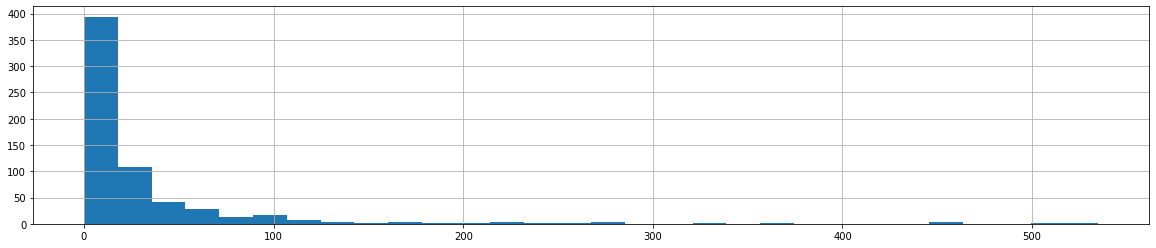

In [7]:
df['Review'].hist(bins=30, figsize=(20,4)); # как распределено количество отзывов

In [8]:
df[df['Review']>10]['sale_june'].count()

329

In [9]:
df.columns # список столбцов нашего датасета

Index(['id', 'Review', 'Star', 'Value', 'brandId', 'brandName', 'goodsName',
       'isSoldOut', 'link', 'lowQuantity', 'ordersCount', 'price',
       'qualityRate', 'Вес с упаковкой (кг)', 'Длина кабеля',
       'Количество температурных режимов', 'Материал корпуса', 'Модель',
       'Мощность устройства', 'Объем чайника', 'Страна бренда',
       'Страна производитель', 'Цвет', 'sale_june'],
      dtype='object')

In [10]:
col=['Star', 'Value', 'brandId', 'ordersCount', 
       'qualityRate', 'Вес с упаковкой (кг)', 'Длина кабеля',
       'Количество температурных режимов', 'Материал корпуса',
       'Мощность устройства', 'Объем чайника', 'Страна бренда',
       'Страна производитель', 'Цвет'] # !!!!! Укажите здесь названия столбцов своего датасета!

# код ниже преобразует категорийные данные в переменные и заполняет пропуски наиболее вероятным значением
X=pd.DataFrame()
for i in col:
    if df[i].dtype.name != 'object':
        X[i]=df[i].copy()
        X.loc[X[i].isna(), i]=X[i].median()
    else:
        X[i]=pd.factorize(df[i])[0]

In [24]:
# результат, подготовленные данные

X.sample(3)

,Star,Value,brandId,ordersCount,qualityRate,Вес с упаковкой (кг),Длина кабеля,Количество температурных режимов,Материал корпуса,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет
485,3.0,3672.0,34696.0,20.0,100.0,3.75,150.0,0,21,1000.0,3.0,15,0,5
113,3.0,616.0,18014.0,70.0,100.0,0.36,100.0,0,-1,600.0,0.6,1,3,44
125,3.0,2811.0,18014.0,100.0,93.0,1.02,70.0,2,6,1800.0,1.6,1,0,1


In [12]:
# Y будет равен нулю если отзывов 10 и меньше, и единице если больше 10

Y=df['Review'].apply(lambda x: 1 if x>10 else 0).values

In [13]:
#разделим набор на тренировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
# создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.3677, 'ordersCount'],
 [0.085, 'brandId'],
 [0.0741, 'Value'],
 [0.0674, 'Star'],
 [0.0647, 'Страна бренда'],
 [0.0644, 'Вес с упаковкой (кг)'],
 [0.0597, 'Цвет'],
 [0.0486, 'qualityRate'],
 [0.0452, 'Длина кабеля'],
 [0.034, 'Материал корпуса'],
 [0.0325, 'Мощность устройства'],
 [0.0289, 'Объем чайника'],
 [0.0247, 'Количество температурных режимов'],
 [0.0032, 'Страна производитель']]

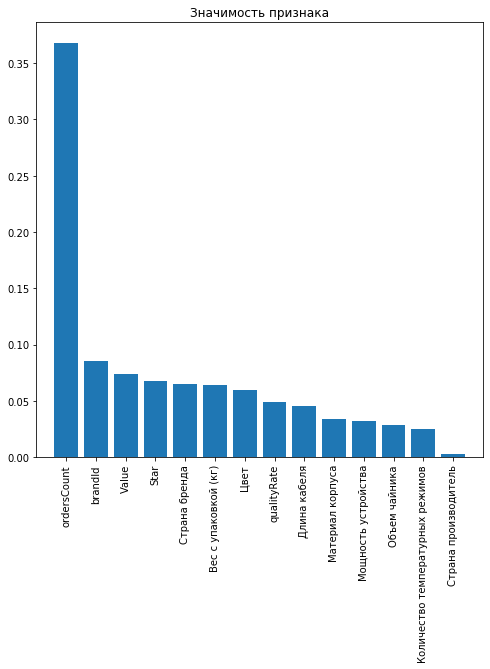

In [16]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [17]:
# как выглядит результат предсказания для тестовой выборки
model.predict(X_test)

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [18]:
# как выглядядт результаты тестового набора
y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [19]:
#R2 Score
r2_score(model.predict(X_test), y_test)

0.3421563865954348

In [20]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.8372093023255814


In [21]:
# матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[49, 12],
       [ 9, 59]])

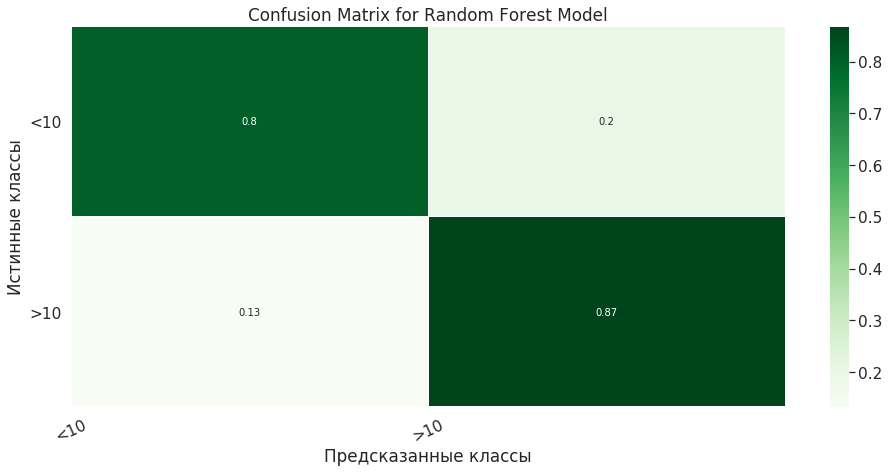

In [22]:
# так же матрица в процентах и более изящном виде
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['<10', '>10']                 # !!!!!! указать названия классов!
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [23]:

from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        61
           1       0.83      0.87      0.85        68

    accuracy                           0.84       129
   macro avg       0.84      0.84      0.84       129
weighted avg       0.84      0.84      0.84       129

